<a href="https://colab.research.google.com/github/Mohit501/MNIST-Digits-Classification/blob/main/Classification_of_handwritten_digits_using_Convolutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Loading and PreProcessing data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.utils import to_categorical,plot_model
from keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_train = tf.one_hot(y_train, 10)
Y_test = tf.one_hot(y_test, 10)

In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0

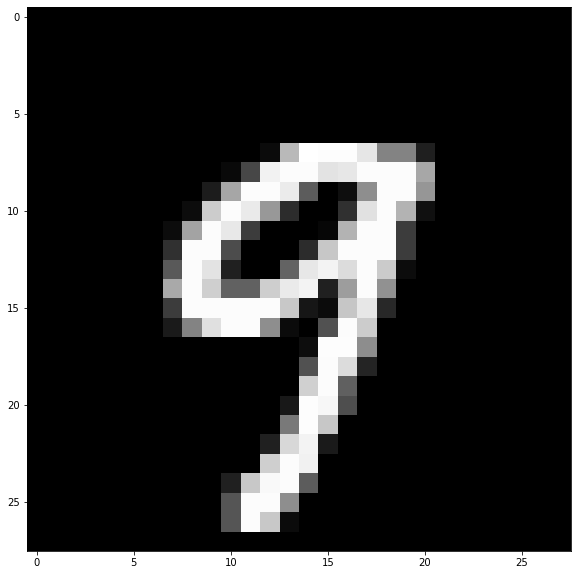

In [ ]:
plt.figure(figsize = (25,10))
plt.imshow(X_train[45],cmap = 'gray')

## **Building Convolutional Neural Network**

In [ ]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 64,kernel_size = (2,2),activation = 'relu',input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64,kernel_size = (2,2),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64,kernel_size = (2,2),activation = 'relu'))

model.add(Dropout(0.2))
model.add(Flatten())


model.add(Dense(64,activation = 'relu'))

model.add(Dense(10,activation = 'softmax'))
  

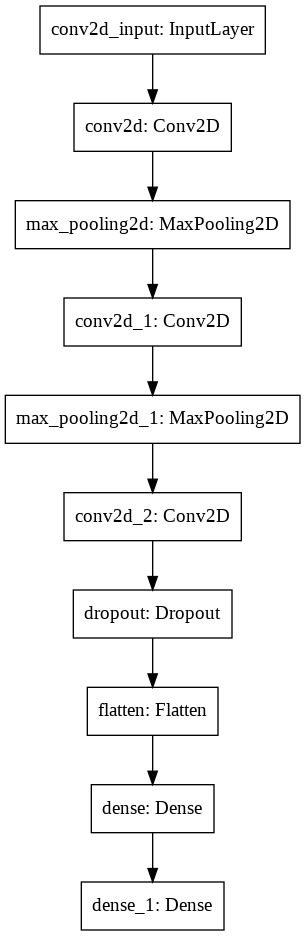

In [ ]:
plot_model(model)

In [ ]:
model.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs = 10,batch_size=128)

Epoch 1/10
469/469 [==============================] - 56s 117ms/step - loss: 0.5718 - accuracy: 0.8253
Epoch 2/10
469/469 [==============================] - 55s 118ms/step - loss: 0.0723 - accuracy: 0.9785
Epoch 3/10
469/469 [==============================] - 55s 118ms/step - loss: 0.0492 - accuracy: 0.9849
Epoch 4/10
469/469 [==============================] - 55s 118ms/step - loss: 0.0397 - accuracy: 0.9872
Epoch 5/10
469/469 [==============================] - 55s 118ms/step - loss: 0.0305 - accuracy: 0.9899
Epoch 6/10
469/469 [==============================] - 56s 119ms/step - loss: 0.0255 - accuracy: 0.9918
Epoch 7/10
469/469 [==============================] - 55s 118ms/step - loss: 0.0224 - accuracy: 0.9929
Epoch 8/10
469/469 [==============================] - 55s 118ms/step - loss: 0.0194 - accuracy: 0.9936
Epoch 9/10
469/469 [==============================] - 55s 117ms/step - loss: 0.0184 - accuracy: 0.9941
Epoch 10/10
469/469 [==============================] - 55s 118ms/step - l

In [ ]:
loss,acc = model.evaluate(X_test,Y_test,batch_size=128)

79/79 [==============================] - 3s 33ms/step - loss: 0.0273 - accuracy: 0.9930


In [ ]:
print('Loss on test data is:',loss)


Loss on test data is: 0.02733916975557804


In [ ]:
print('test accuracy is:',acc*100)

test accuracy is: 99.29999709129333
